In [52]:
%%time
import pytube
import whisper
import nltk
import text2emotion as te
import matplotlib.pyplot as plt
import numpy as np

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Wall time: 0 ns


In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juanchu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
stop_words_spañol = set(stopwords.words('spanish'))

In [102]:
stop_words_spañol2 = set([
 "uh",
 "uh,",
 "uh-uh,",
 "uh-uh",
 "pa",
 "Pa'",
 'pa-pa-pa-pa-pa-pa',
 'pa-pa-pa-pa-pa',
    "ah",
    "-ah",
    "uh-",
    "♪",
    "uh-uh-uh-uh-ah-ah",
    "pa'"
 ])

In [103]:
stop_words_spañol= stop_words_spañol.union(stop_words_spañol2)

In [6]:
%%time 
youtube_url = 'https://www.youtube.com/watch?v=CocEMWdc7Ck'  
youtube_video= pytube. YouTube (youtube_url)

In [7]:
%%time
audio = youtube_video.streams.get_audio_only() 
audio.download(filename = 'tmp.mp3')

'C:\\Users\\Juanchu\\Desktop\\Analisis_Predicciones\\analisis_sentimientos_canciones\\tmp.mp3'

In [8]:
%%time
model = whisper.load_model("large")
result = model.transcribe("tmp.mp3", fp16 =False)
print(result["text"])

 ♪ Perdón, te acogí otro avión Aquí no vuelvo No quiero otra recepción Tanto que te la das de campeón Fuendo, te necesitaba Viste tu peor versión Sorry, baby Hace rato Que yo te vi Bocar ese gato Una loba como yo No está pa' no vato Una loba como yo No está pa' tipos como tú Pa' tipos como tú A ti te queda grande Y por eso estás con una igualita que tú Esto es pa' que te mortifique Mastique, trague, trague, mastique Yo contigo ya no regreso Ni que me llores ni me suplique Vente en mí que no es culpa mía que te critique Yo solo hago música Perdón que te salpique Me dejaste de vecina a la suegra Con la prensa en la puerta Y la deuda naciendo Te creíste que me heriste Y me volviste más dura Las mujeres ya no lloran Las mujeres facturan Tiene nombre de persona buena Claramente no es como suena Tiene nombre de persona buena Claramente es igualita que tú Pa' tipos como tú A ti te queda grande Y por eso estás con una igualita que tú De enamoralo y haya un paso Por acá no vuélvame a caso Cero 

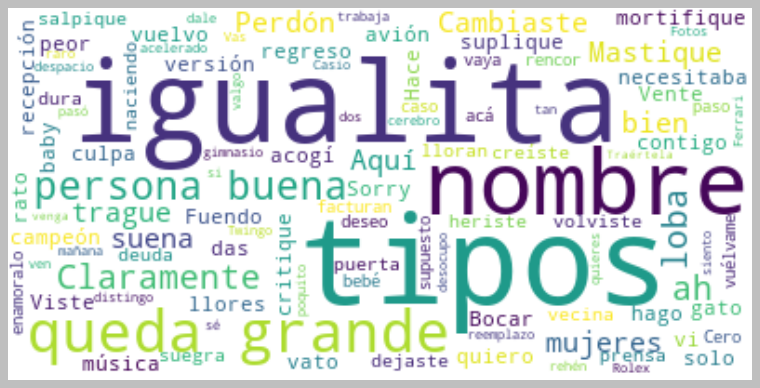

In [11]:
text =result["text"]
#text = " ".join(i for i in result["text"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stop_words_spañol, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

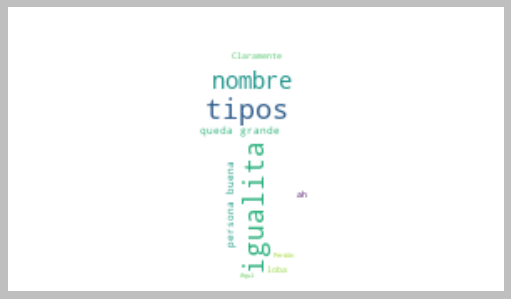

In [12]:
mask = np.array(Image.open("shakira.png"))
mask[mask == 0] = 255

wordcloud = WordCloud(background_color = "white", stopwords = stop_words_spañol, max_words = 10, mask = mask).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [14]:
%%time
te.get_emotion(text)

Wall time: 3.61 s


{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, 'Sad': 0.5, 'Fear': 0.0}